# Myntra T-shirt Exploratory Data Analysis
## Data Collection and Source
- Dataset loaded from local CSV `mynta_page(1-99).csv`, a snapshot of product listings.

## Data Cleaning and Preprocessing (Summary)
- Standardized column names, parsed discount percentages to numeric, filled missing price values, and engineered features used in analysis.

## EDA and Visualization Plan
- Use distributions, boxplots, bar charts, scatter plots, and correlation heatmaps to interpret price and discount behavior.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

file_path = r"d:\EDAs\EDAs\myntaEDA\mynta_page(1-99).csv"
df = pd.read_csv(file_path)
df.head()

,Brand,Title,Selling Price,Price,Discount
0,HRX by Hrithik Roshan,Printed Round Neck T-Shirt,664,699,5%
1,HERE&NOW,Solid Polo T-shirt,399,799,50%
2,Moda Rapido,Colourblocked Round Neck T-shirt,454,699,35%
3,Roadster,Camouflage Round Neck T-shirt,454,699,35%
4,DILLINGER,Colourblocked Round Neck Navy Blue T-shirt,449,899,50%


In [30]:
df.info()

print("\nNumeric summary:")
print(df.describe(include=[np.number]))

print("\nObject summary:")
print(df.describe(include=["object"]))

print("\nMissing values per column:")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4950 non-null   object
 1   Title          4950 non-null   object
 2   Selling Price  4950 non-null   int64 
 3   Price          4950 non-null   object
 4   Discount       4950 non-null   object
dtypes: int64(1), object(4)
memory usage: 193.5+ KB

Numeric summary:
       Selling Price
count    4950.000000
mean      890.008889
std       775.847740
min       199.000000
25%       449.000000
50%       689.000000
75%       906.500000
max      8260.000000

Object summary:
           Brand                       Title Price Discount
count       4950                        4950  4950     4950
unique       195                         812   170       88
top     Roadster  Printed Round Neck T-shirt   699       0%
freq         648                         713   570      910

Missing values p

In [31]:
df.columns = [c.strip() for c in df.columns]

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

df["Discount_clean"] = (
    df["Discount"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.replace(" ", "", regex=False)
)

df["Discount_clean"] = pd.to_numeric(df["Discount_clean"], errors="coerce")

for col in ["Selling Price", "Price"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df[["Selling Price", "Price", "Discount", "Discount_clean"]].head()

,Selling Price,Price,Discount,Discount_clean
0,664,699.0,5%,5.0
1,399,799.0,50%,50.0
2,454,699.0,35%,35.0
3,454,699.0,35%,35.0
4,449,899.0,50%,50.0


In [32]:
print("Missing after conversions:")
print(df[["Selling Price", "Price", "Discount_clean"]].isna().sum())

df = df.dropna(subset=["Selling Price", "Price"], how="all").reset_index(drop=True)

mask_sp_null = df["Selling Price"].isna() & df["Price"].notna()
df.loc[mask_sp_null, "Selling Price"] = df.loc[mask_sp_null, "Price"]

mask_p_null = df["Price"].isna() & df["Selling Price"].notna()
df.loc[mask_p_null, "Price"] = df.loc[mask_p_null, "Selling Price"]

mask_disc_null = df["Discount_clean"].isna() & df["Price"].notna() & df["Selling Price"].notna()
df.loc[mask_disc_null, "Discount_clean"] = (
    (df.loc[mask_disc_null, "Price"] - df.loc[mask_disc_null, "Selling Price"])
    / df.loc[mask_disc_null, "Price"]
) * 100

df["Discount_clean"] = df["Discount_clean"].round(2)

print("\nMissing after handling:")
print(df[["Selling Price", "Price", "Discount_clean"]].isna().sum())

Missing after conversions:
Selling Price      0
Price             73
Discount_clean    73
dtype: int64

Missing after handling:
Selling Price     0
Price             0
Discount_clean    0
dtype: int64


In [33]:
brand_counts = df["Brand"].value_counts()

df["Discount_amount"] = df["Price"] - df["Selling Price"]
df["Discount_ratio"] = df["Discount_amount"] / df["Price"]
df["Title_length"] = df["Title"].astype(str).str.len()
df["Brand_frequency"] = df["Brand"].map(brand_counts)

df[["Selling Price", "Price", "Discount_clean", "Discount_amount", "Discount_ratio", "Title_length", "Brand_frequency"]].head()

,Selling Price,Price,Discount_clean,Discount_amount,Discount_ratio,Title_length,Brand_frequency
0,664,699.0,5.0,35.0,0.050072,26,181
1,399,799.0,50.0,400.0,0.500626,18,162
2,454,699.0,35.0,245.0,0.350501,32,168
3,454,699.0,35.0,245.0,0.350501,29,648
4,449,899.0,50.0,450.0,0.500556,42,24


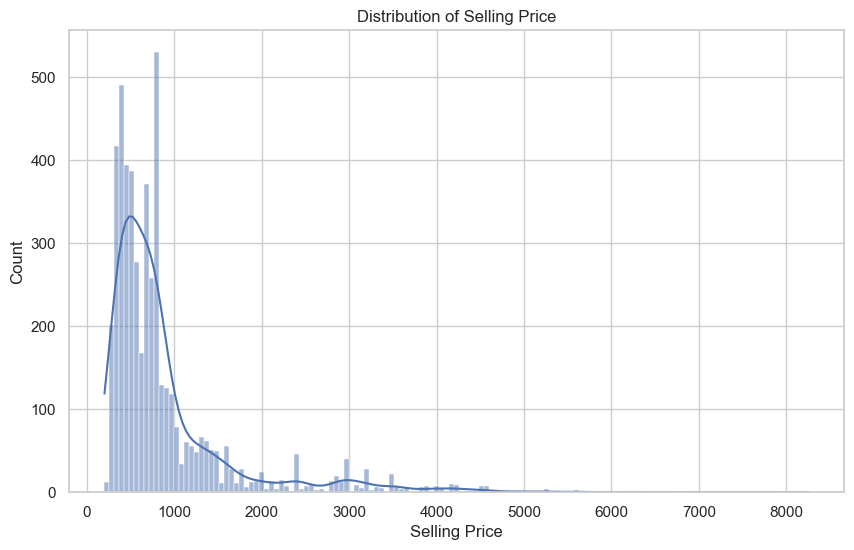

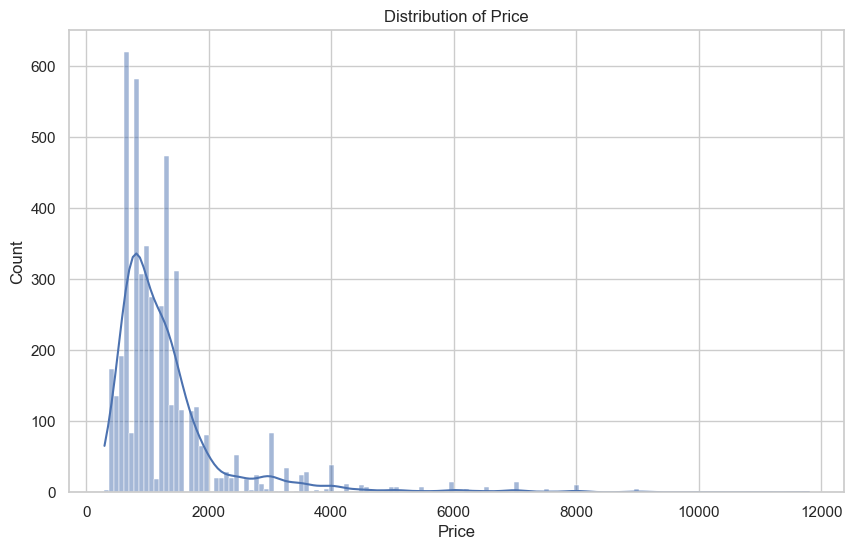

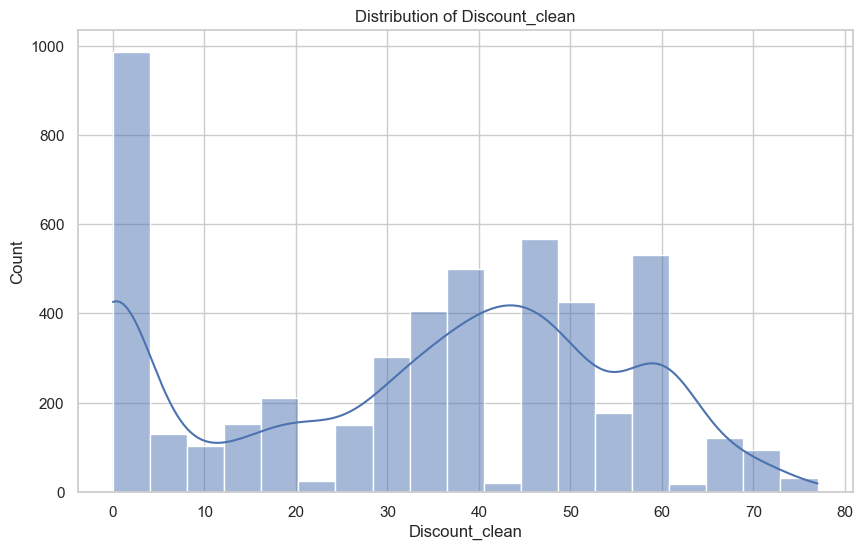

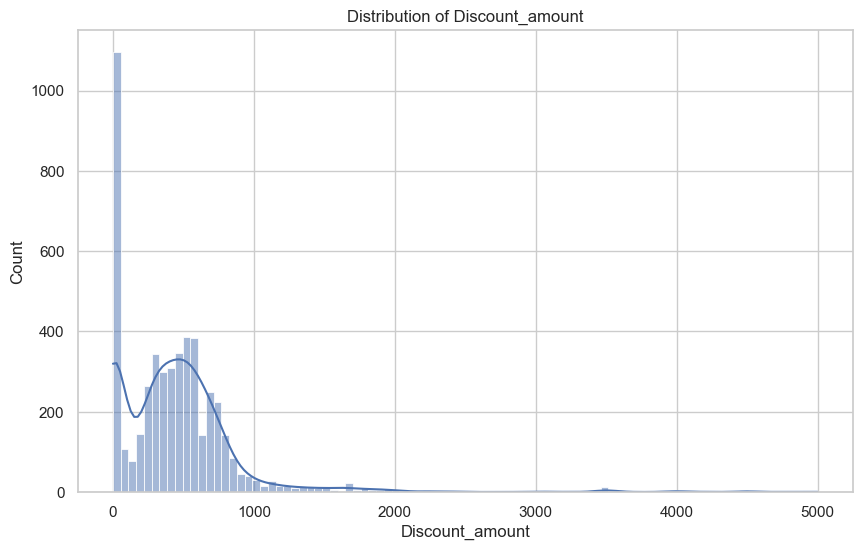

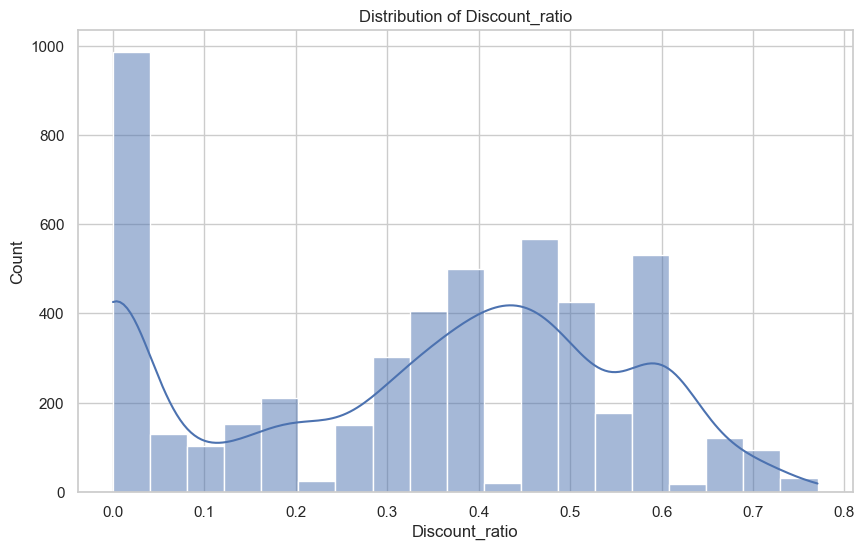

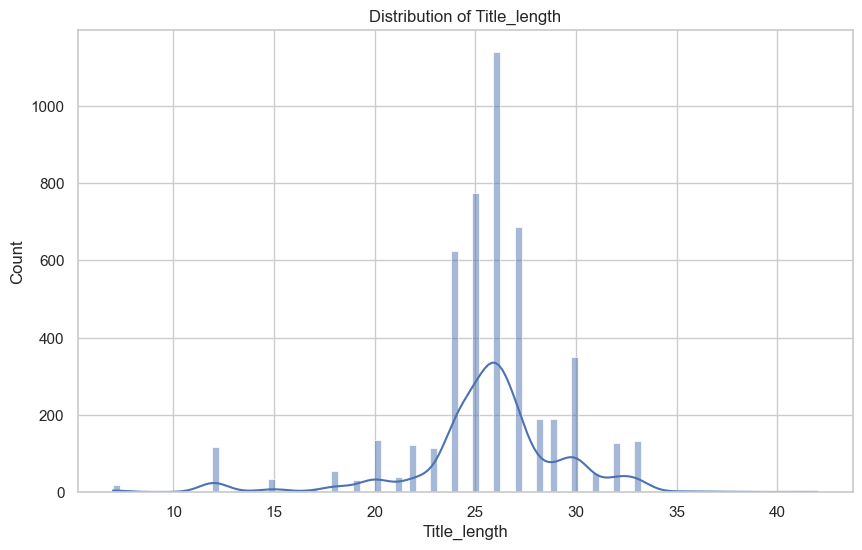

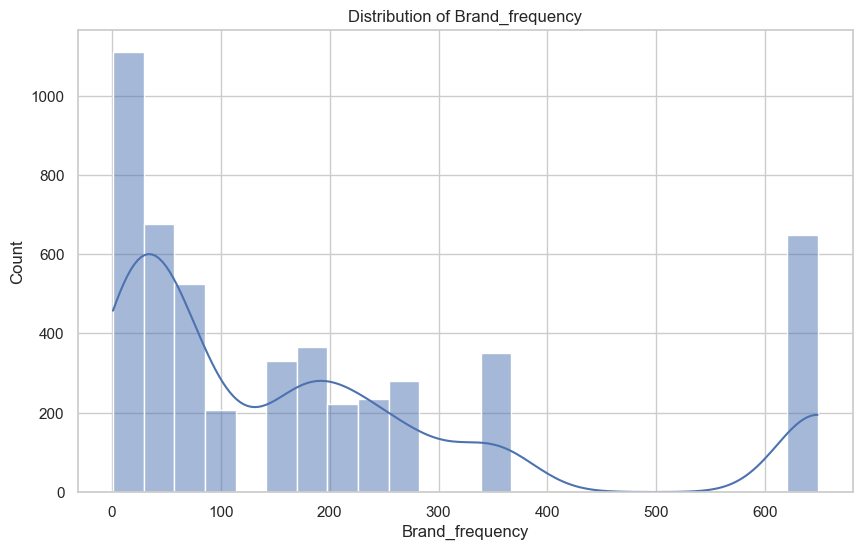

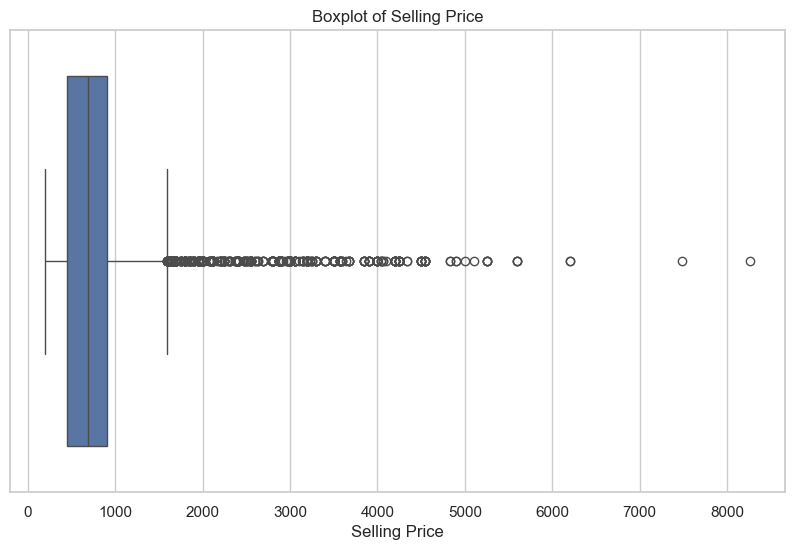

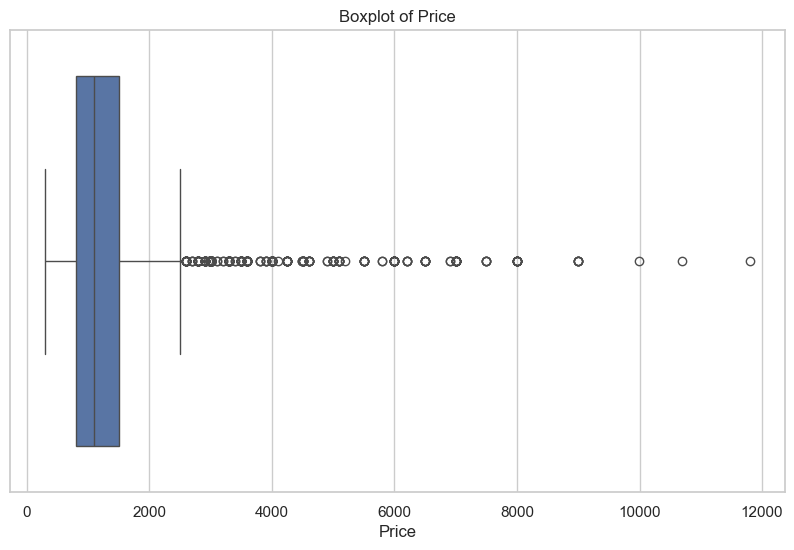

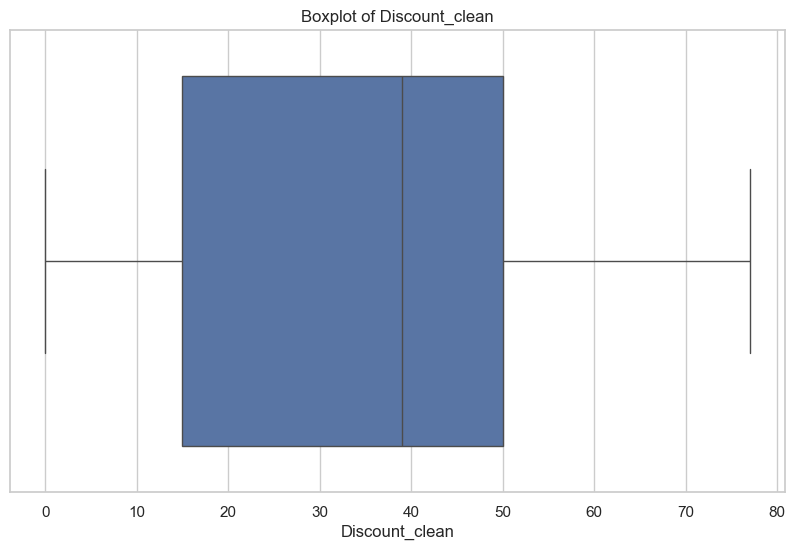

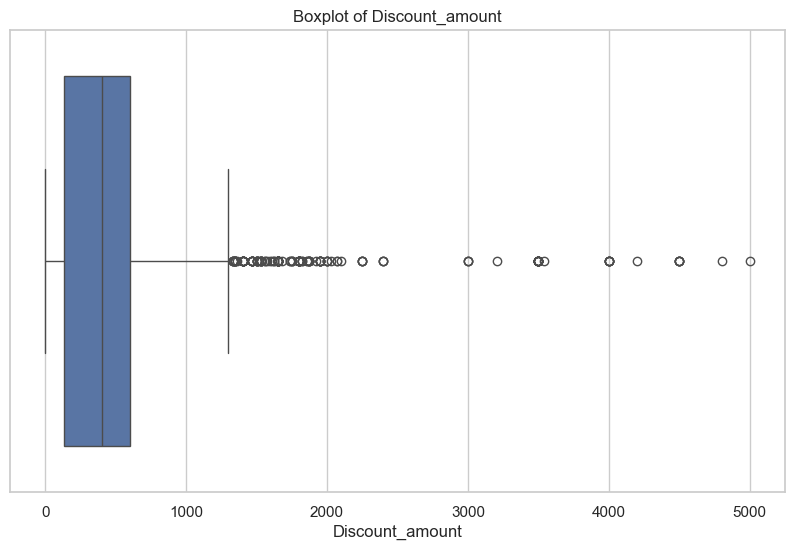

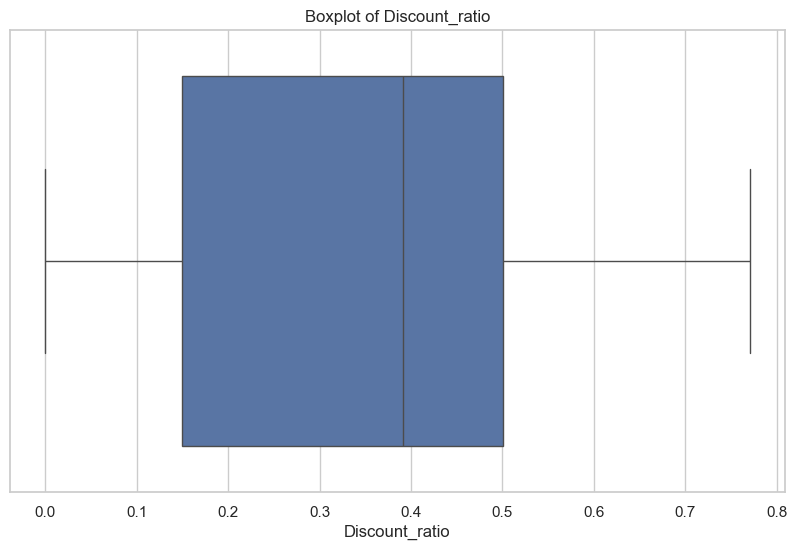

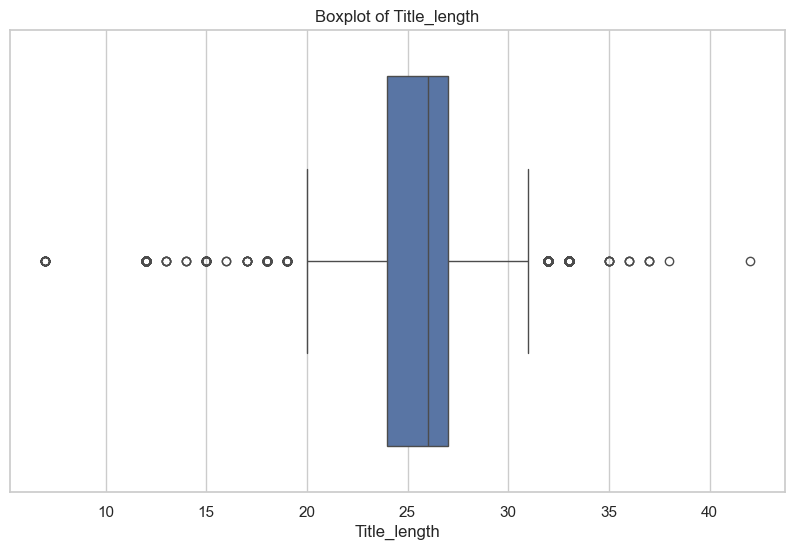

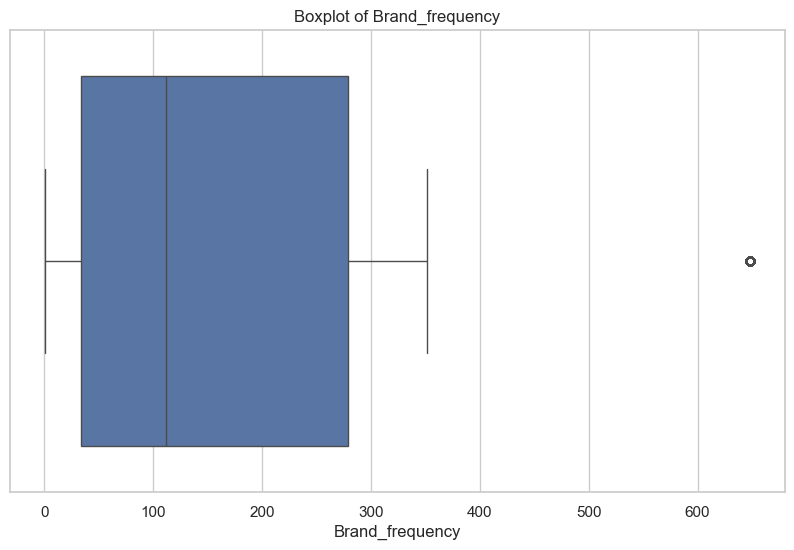

In [34]:
numeric_cols = [
    "Selling Price",
    "Price",
    "Discount_clean",
    "Discount_amount",
    "Discount_ratio",
    "Title_length",
    "Brand_frequency",
]

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

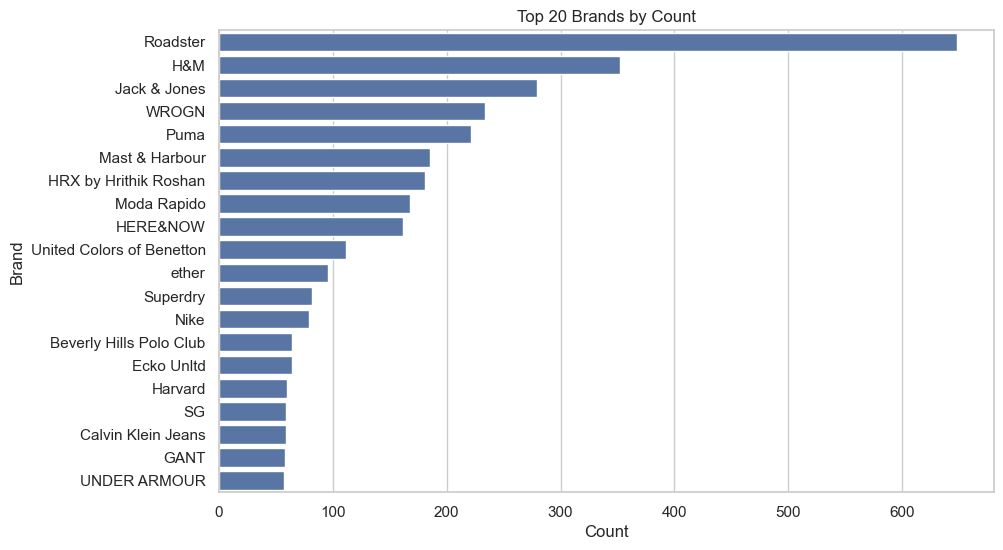

Brand
Roadster                     648
H&M                          352
Jack & Jones                 279
WROGN                        234
Puma                         221
Mast & Harbour               185
HRX by Hrithik Roshan        181
Moda Rapido                  168
HERE&NOW                     162
United Colors of Benetton    112
Name: count, dtype: int64


In [35]:
top_n = 20
top_brands = df["Brand"].value_counts().head(top_n)

plt.figure()
sns.barplot(x=top_brands.values, y=top_brands.index, orient="h")
plt.title(f"Top {top_n} Brands by Count")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()

print(top_brands.head(10))

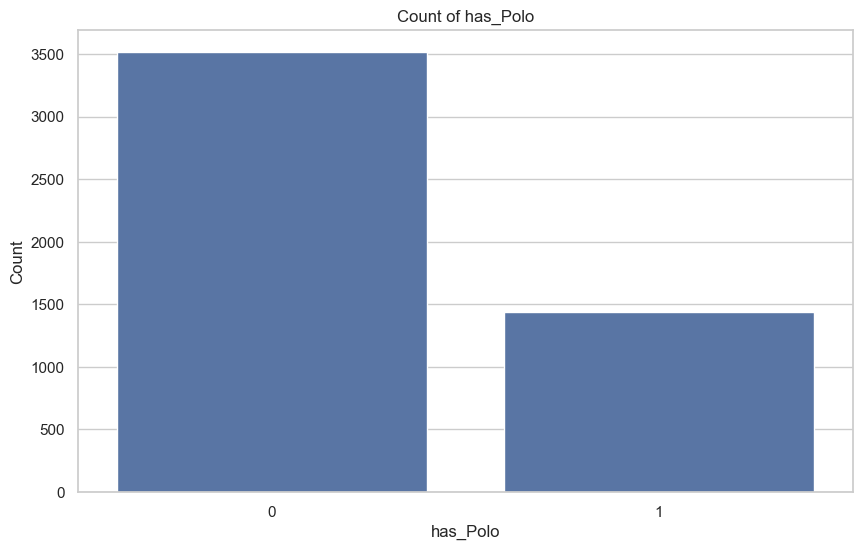

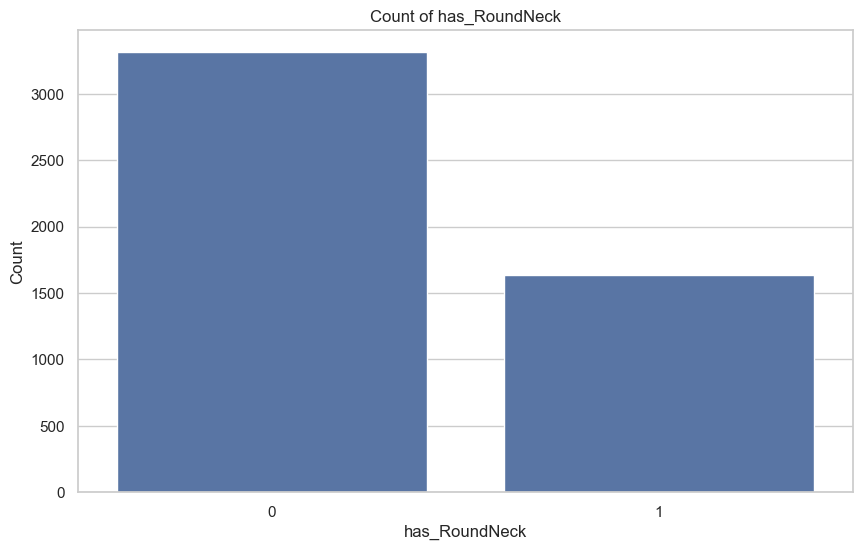

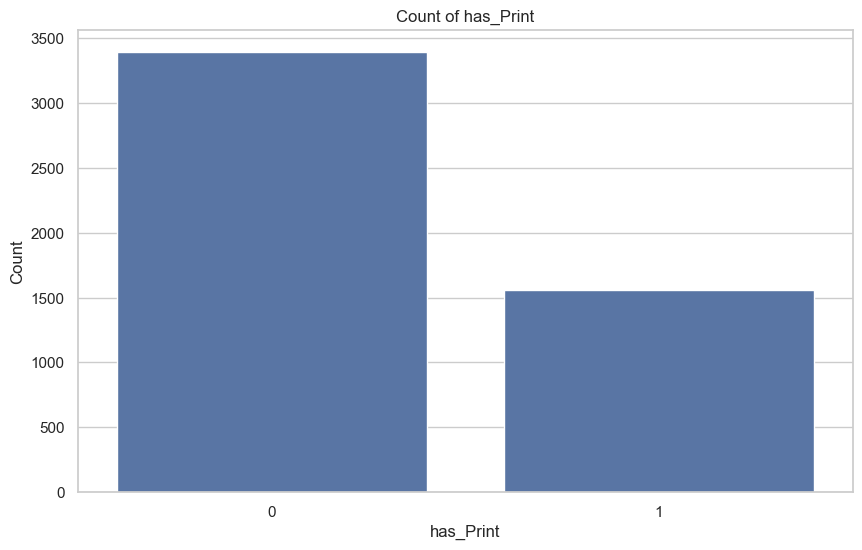

,Title,has_Polo,has_RoundNeck,has_Print
0,Printed Round Neck T-Shirt,0,1,1
1,Solid Polo T-shirt,1,0,0
2,Colourblocked Round Neck T-shirt,0,1,0
3,Camouflage Round Neck T-shirt,0,1,0
4,Colourblocked Round Neck Navy Blue T-shirt,0,1,0


In [36]:
df["has_Polo"] = df["Title"].str.contains("Polo", case=False, na=False).astype(int)
df["has_RoundNeck"] = df["Title"].str.contains("Round Neck", case=False, na=False).astype(int)
df["has_Print"] = df["Title"].str.contains("Print", case=False, na=False).astype(int)

for col in ["has_Polo", "has_RoundNeck", "has_Print"]:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

df[["Title", "has_Polo", "has_RoundNeck", "has_Print"]].head()

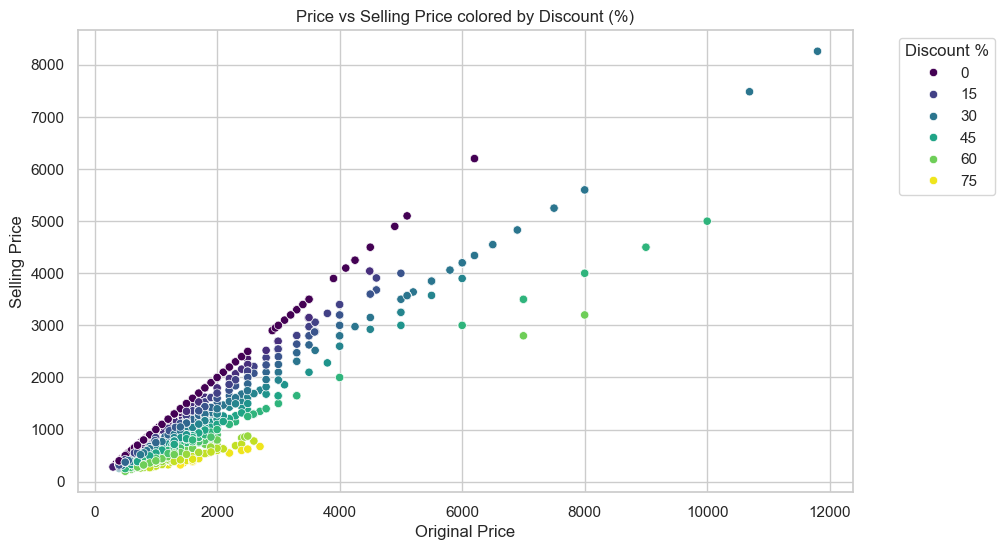

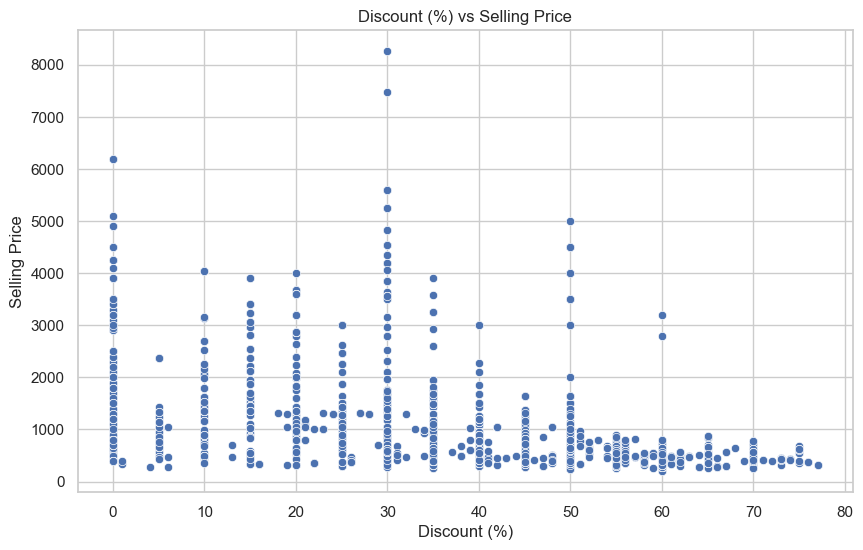

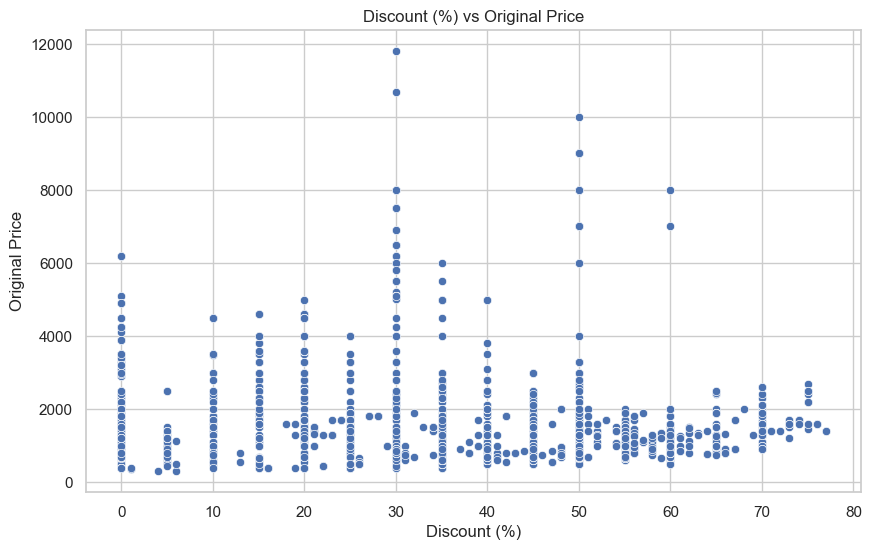

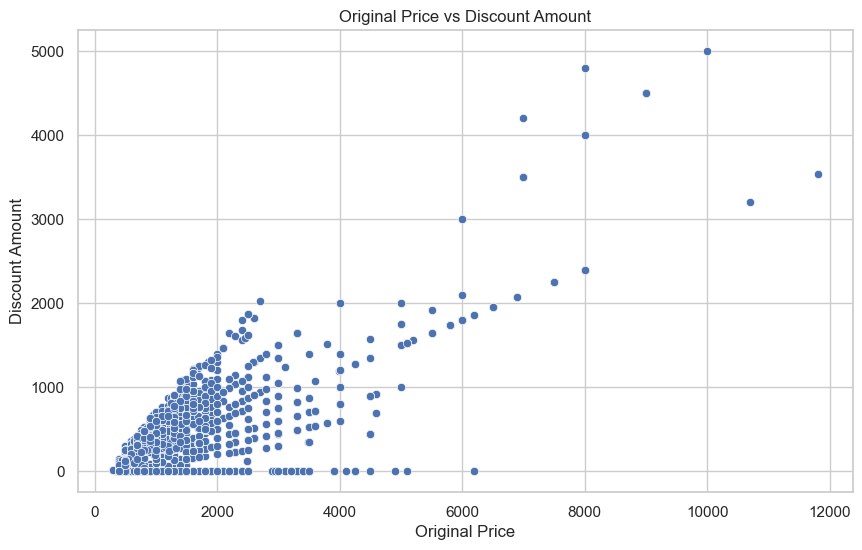

In [37]:
plt.figure()
sns.scatterplot(data=df, x="Price", y="Selling Price", hue="Discount_clean", palette="viridis")
plt.title("Price vs Selling Price colored by Discount (%)")
plt.xlabel("Original Price")
plt.ylabel("Selling Price")
plt.legend(title="Discount %", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

plt.figure()
sns.scatterplot(data=df, x="Discount_clean", y="Selling Price")
plt.title("Discount (%) vs Selling Price")
plt.xlabel("Discount (%)")
plt.ylabel("Selling Price")
plt.show()

plt.figure()
sns.scatterplot(data=df, x="Discount_clean", y="Price")
plt.title("Discount (%) vs Original Price")
plt.xlabel("Discount (%)")
plt.ylabel("Original Price")
plt.show()

plt.figure()
sns.scatterplot(data=df, x="Price", y="Discount_amount")
plt.title("Original Price vs Discount Amount")
plt.xlabel("Original Price")
plt.ylabel("Discount Amount")
plt.show()

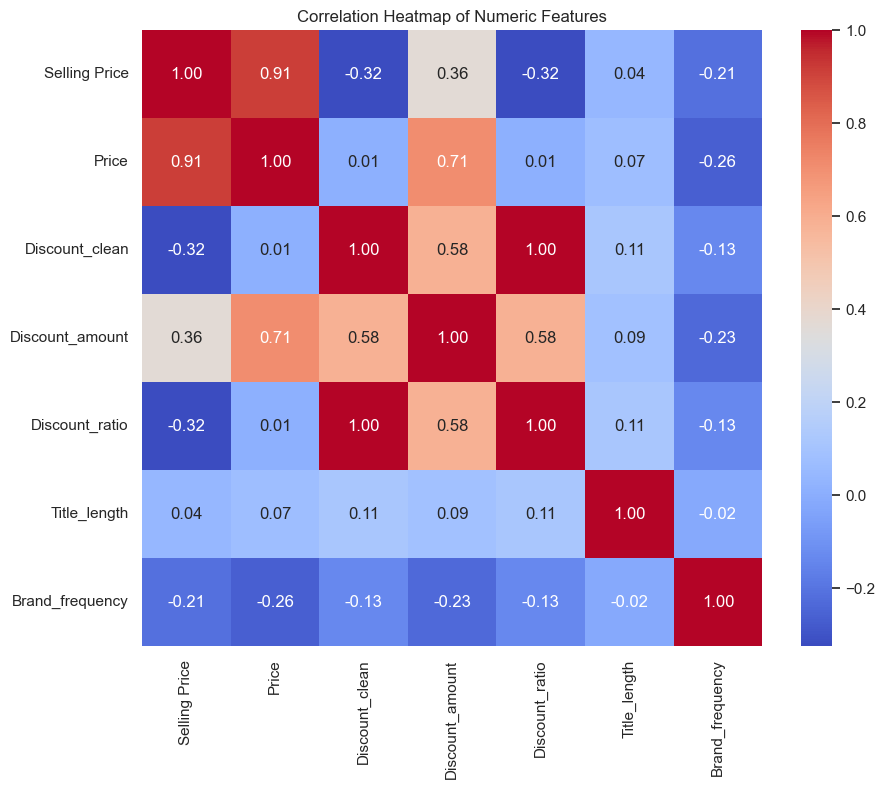

In [38]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

                           avg_selling_price    avg_price  avg_discount  count
Brand                                                                         
Roadster                          594.125000   873.075617     30.956790    648
H&M                               679.397727   679.397727      0.000000    352
Jack & Jones                      796.652330  1380.003584     41.344086    279
WROGN                             678.017094  1037.888889     34.059829    234
Puma                             1070.538462  1644.248869     35.904977    221
Mast & Harbour                    398.891892   822.513514     50.729730    185
HRX by Hrithik Roshan             669.154696  1039.883978     31.900552    181
Moda Rapido                       499.089286   778.464286     35.625000    168
HERE&NOW                          417.395062   940.666667     54.722222    162
United Colors of Benetton         938.785714  1467.928571     35.687500    112


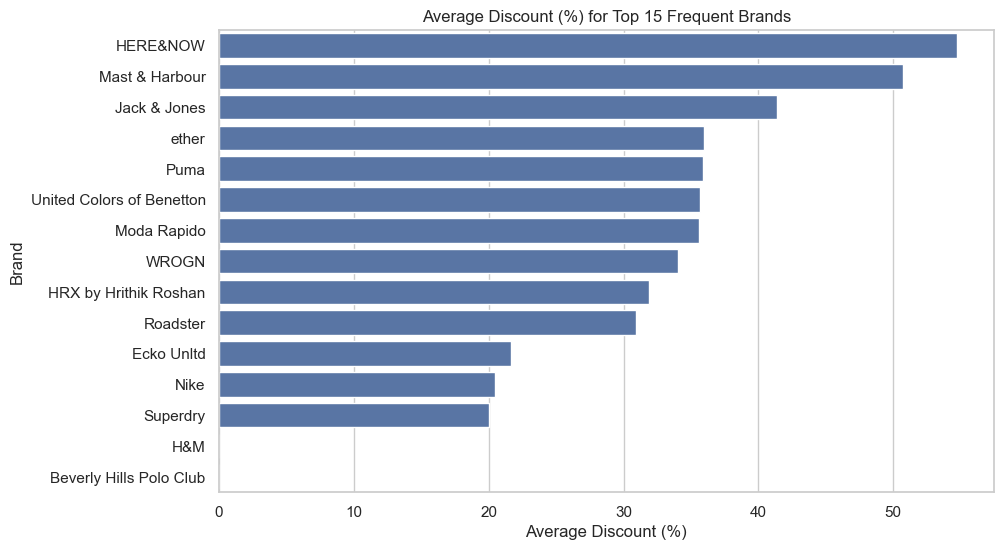

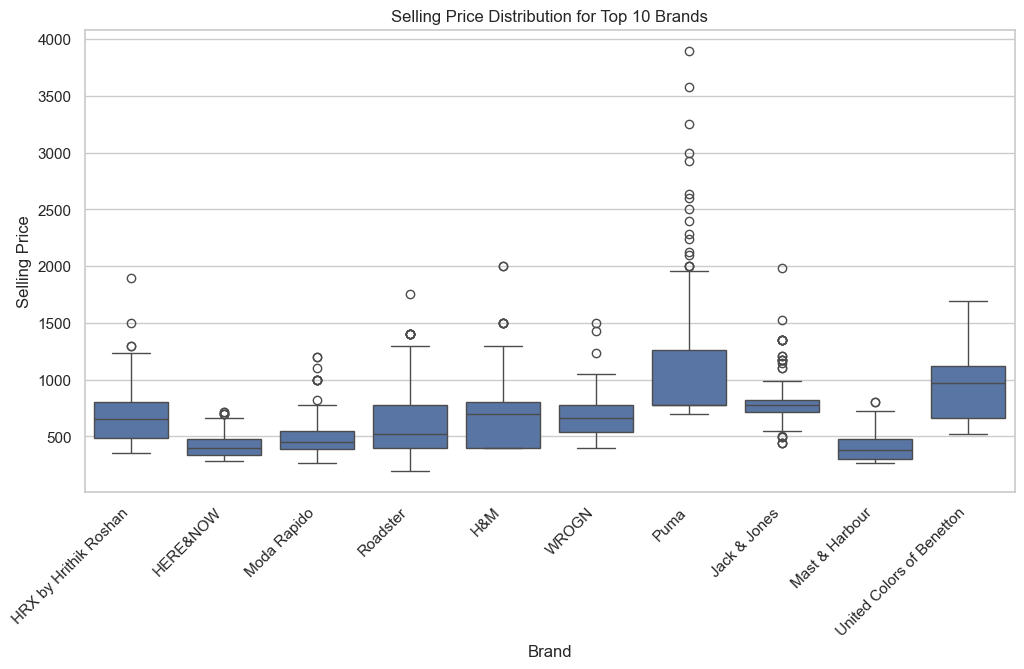

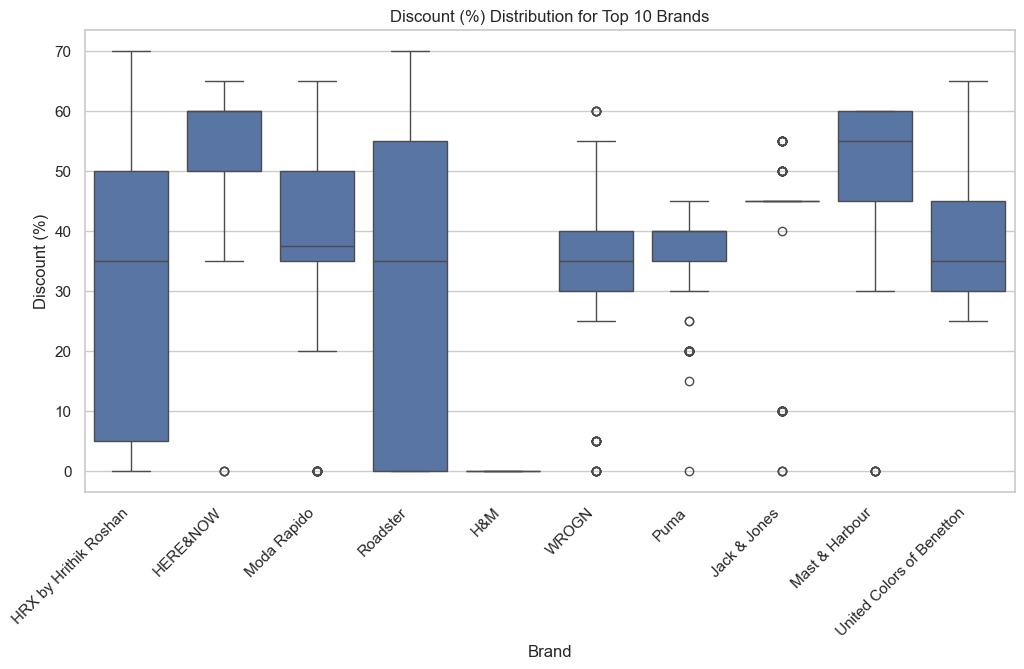

In [39]:
brand_agg = (
    df.groupby("Brand")
    .agg(
        avg_selling_price=("Selling Price", "mean"),
        avg_price=("Price", "mean"),
        avg_discount=("Discount_clean", "mean"),
        count=("Brand", "size"),
    )
    .sort_values("count", ascending=False)
)

print(brand_agg.head(10))

top_brands_analysis = brand_agg.head(15).sort_values("avg_discount", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_brands_analysis["avg_discount"],
    y=top_brands_analysis.index,
    orient="h",
)
plt.title("Average Discount (%) for Top 15 Frequent Brands")
plt.xlabel("Average Discount (%)")
plt.ylabel("Brand")
plt.show()

top_brands_names = df["Brand"].value_counts().head(10).index
df_top_brands = df[df["Brand"].isin(top_brands_names)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_brands, x="Brand", y="Selling Price")
plt.title("Selling Price Distribution for Top 10 Brands")
plt.xlabel("Brand")
plt.ylabel("Selling Price")
plt.xticks(rotation=45, ha="right")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_brands, x="Brand", y="Discount_clean")
plt.title("Discount (%) Distribution for Top 10 Brands")
plt.xlabel("Brand")
plt.ylabel("Discount (%)")
plt.xticks(rotation=45, ha="right")
plt.show()

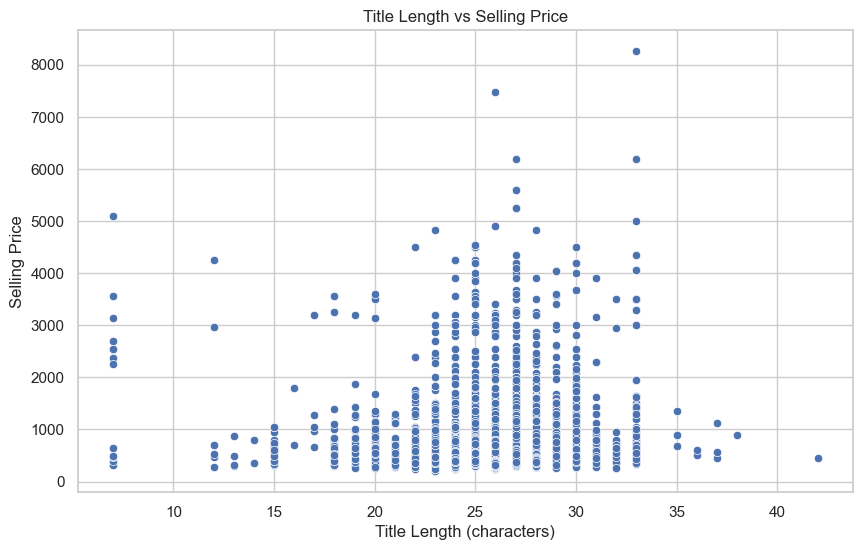

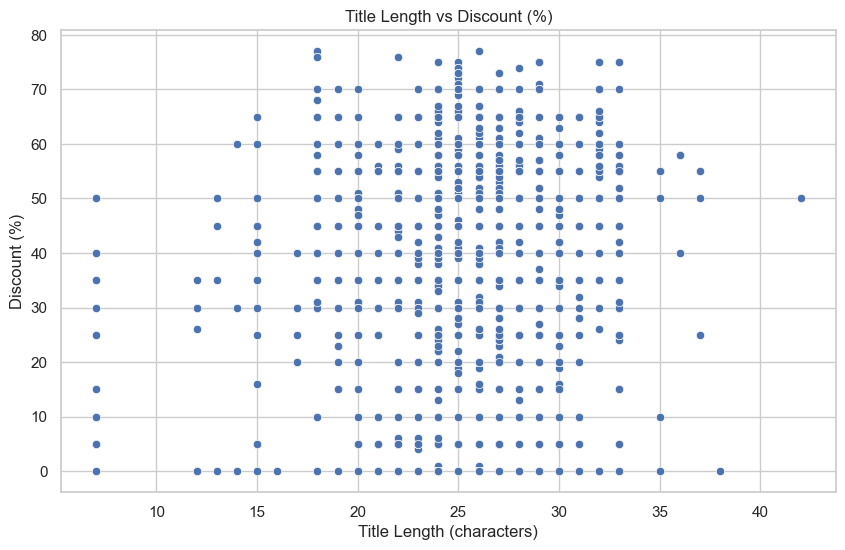

In [40]:
plt.figure()
sns.scatterplot(data=df, x="Title_length", y="Selling Price")
plt.title("Title Length vs Selling Price")
plt.xlabel("Title Length (characters)")
plt.ylabel("Selling Price")
plt.show()

plt.figure()
sns.scatterplot(data=df, x="Title_length", y="Discount_clean")
plt.title("Title Length vs Discount (%)")
plt.xlabel("Title Length (characters)")
plt.ylabel("Discount (%)")
plt.show()

In [41]:
brand_encoder = {b: i for i, b in enumerate(df["Brand"].astype("category").cat.categories)}
df["Brand_encoded"] = df["Brand"].map(brand_encoder)

df[["Brand", "Brand_encoded"]].head()

,Brand,Brand_encoded
0,HRX by Hrithik Roshan,79
1,HERE&NOW,77
2,Moda Rapido,120
3,Roadster,148
4,DILLINGER,47


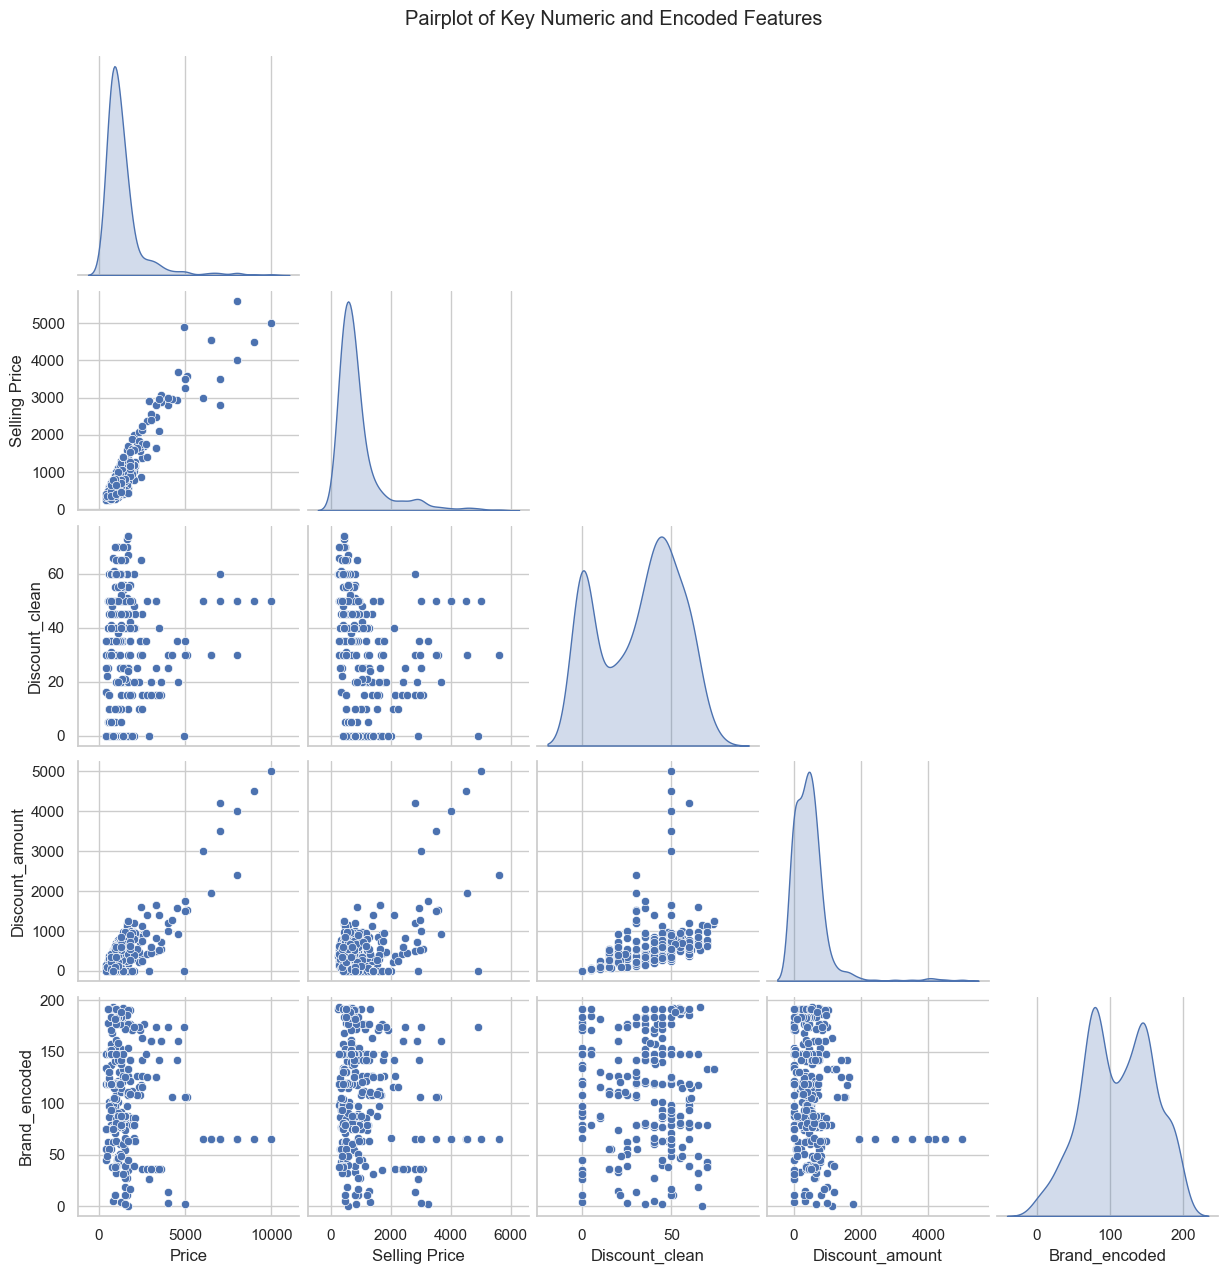

In [42]:
sample_df = df.sample(min(500, len(df)), random_state=42)

sns.pairplot(
    sample_df,
    vars=["Price", "Selling Price", "Discount_clean", "Discount_amount", "Brand_encoded"],
    corner=True,
    diag_kind="kde",
)
plt.suptitle("Pairplot of Key Numeric and Encoded Features", y=1.02)
plt.show()

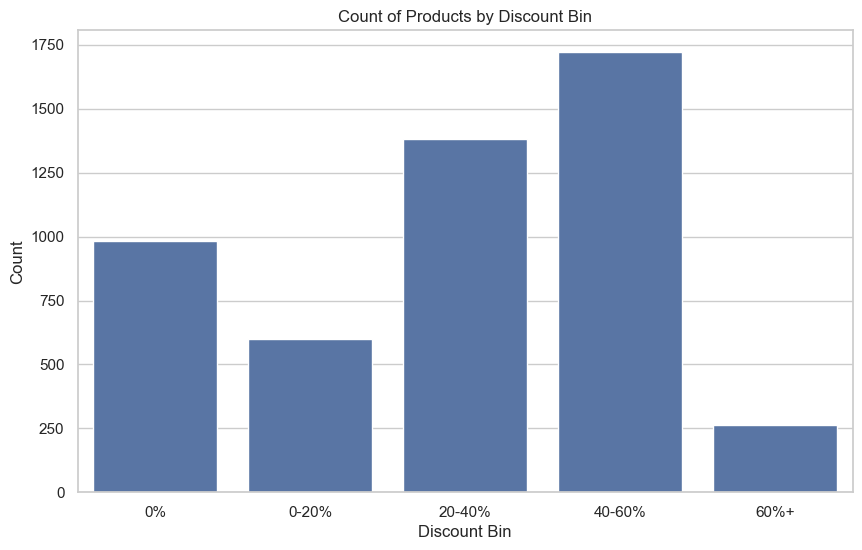

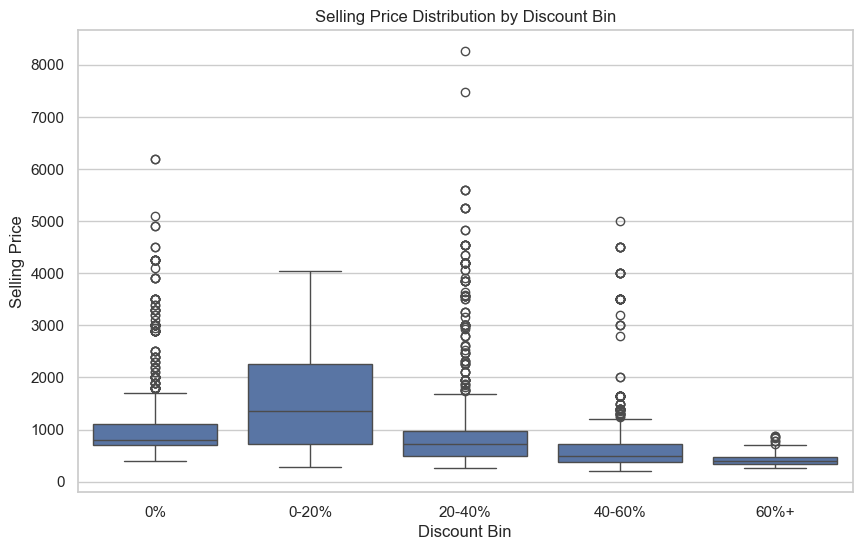

In [43]:
bins = [-0.5, 0, 20, 40, 60, 100]
labels = ["0%", "0-20%", "20-40%", "40-60%", "60%+"]

df["Discount_bin"] = pd.cut(df["Discount_clean"], bins=bins, labels=labels)

plt.figure()
sns.countplot(x=df["Discount_bin"], order=labels)
plt.title("Count of Products by Discount Bin")
plt.xlabel("Discount Bin")
plt.ylabel("Count")
plt.show()

plt.figure()
sns.boxplot(x=df["Discount_bin"], y=df["Selling Price"], order=labels)
plt.title("Selling Price Distribution by Discount Bin")
plt.xlabel("Discount Bin")
plt.ylabel("Selling Price")
plt.show()

In [44]:
output_path = r"d:\EDAs\EDAs\myntaEDA\mynta_page_cleaned_features.csv"
df.to_csv(output_path, index=False)
output_path

'd:\\EDAs\\EDAs\\myntaEDA\\mynta_page_cleaned_features.csv'

## EDA Summary for Myntra T-shirt Dataset

**Dataset Overview**  
- The dataset contains T-shirt product listings with the main columns: `Brand`, `Title`, `Selling Price`, `Price`, and `Discount`.  
- Additional engineered features include `Discount_clean` (numeric discount %), `Discount_amount`, `Discount_ratio`, `Title_length`, `Brand_frequency`, simple title-based flags (`has_Polo`, `has_RoundNeck`, `has_Print`), and `Brand_encoded`.  
- After cleaning, missing values in price-related fields were handled by logical filling (using the alternative price column) and by recomputing discounts from price and selling price when possible.

**Data Cleaning and Preprocessing**  
- Column names and string fields were stripped of extra whitespace.  
- The `Discount` field contained `%` signs and irregular spacing; it was cleaned, converted into a numeric `Discount_clean`, and further used to derive quantitative discount features.  
- Rows with both `Price` and `Selling Price` missing were dropped, and missing single values were imputed using the available counterpart.  
- A cleaned and feature-enriched version of the dataset was saved for downstream analysis or modeling.

**Univariate Analysis Insights**  
- Distributions of `Price` and `Selling Price` show typical right-skewed behavior: a majority of products are in lower to mid price ranges, with a smaller number of high-priced items.  
- `Discount_clean` and `Discount_amount` distributions reveal that many products have moderate discounts, with groups around common promotional levels (e.g., 0%, 20–40%, 40–60%).  
- Boxplots highlight the presence of high-price and high-discount outliers, corresponding to premium brands or heavily discounted items.  
- Title lengths are moderately spread, reflecting varying levels of descriptive detail in product titles.

**Categorical Analysis (Brands and Title Features)**  
- Brand frequency plots show a set of dominant brands that contribute a large portion of the listings, while many brands have relatively few products.  
- Among the top brands, there is noticeable variation in both average `Selling Price` and average `Discount_clean`. Some brands focus on budget/mid-range pricing with higher discounts, while others maintain higher price points with moderate discounts.  
- Simple text-based flags (`has_Polo`, `has_RoundNeck`, `has_Print`) provide a basic view into product style attributes, and their counts show which styles are most common in the catalog.

**Bivariate and Multivariate Relationships**  
- Scatter plots of `Price` vs `Selling Price` colored by `Discount_clean` show a clear, almost linear relationship where higher original prices correspond to higher selling prices, with discounts shifting points away from the diagonal.  
- `Discount_clean` vs `Price` and `Discount_clean` vs `Selling Price` indicate that higher-priced items often have notable but not uniformly larger discounts; discount patterns are influenced by both brand strategy and segment positioning.  
- `Price` vs `Discount_amount` plots show that absolute discount tends to grow with original price, meaning premium items offer larger rupee discounts even when percentage discounts are similar.  
- The correlation heatmap reveals strong positive correlation between `Price` and `Selling Price`, as expected, and strong relationships between `Discount_amount`, `Discount_ratio`, and `Discount_clean`.  
- `Title_length` shows mild associations with pricing and discounting; longer titles may be slightly linked with higher price or more descriptive premium listings, but the relationship is not dominant.  
- Grouped boxplots by brand demonstrate that different brands occupy distinct price and discount ranges: some brands cluster at low–mid price with aggressive discounting, others at mid–high price with more modest discounts.

**Discount Binning and Price Behavior**  
- By binning discounts into categories (0%, 0–20%, 20–40%, 40–60%, 60%+), we see that the majority of products fall into a few key promotional brackets.  
- Selling price distributions by discount bin show that higher discount bins often correspond to higher original prices being brought down, as well as clearance-like discount behavior for some items.  
- The lowest discount bins capture full-price or lightly discounted products, frequently associated with either new arrivals or premium/priced-to-value items.

**Encoding and Feature Extraction for Modeling**  
- `Brand` was encoded numerically (`Brand_encoded`), and together with numeric price and discount features, this forms a compact feature set for downstream modeling tasks (e.g., predicting selling price, discount level, or categorizing products by price segment).  
- Features such as `Brand_frequency`, `Title_length`, and content flags (`has_Polo`, `has_RoundNeck`, `has_Print`) capture brand popularity and simple style semantics that may explain pricing and discount behavior.

**Overall Understanding from this EDA**  
- The dataset reflects a fashion e-commerce catalog where prices and discounts are strongly structured by brand and product style.  
- There is a clear hierarchy of brands in terms of volume, price positioning, and discount strategies, with some brands competing on deeper discounts and others on premium pricing.  
- Discounts, both as percentages and absolute amounts, are key drivers of the observed price structure, and they show consistent relationships with original price and brand.  
- The cleaned and feature-enriched dataset is now suitable for further tasks like clustering products, building price/discount recommendation models, or performing more detailed style-based segmentation of the catalog.

## Interpretation and Conclusions
- Prices and discounts show structured patterns by brand and product attributes.
- Discount amount scales with original price, while discount percentage varies by brand strategy.
- The cleaned dataset and engineered features are suitable for deeper segmentation or modeling.
